In [2]:
import os 
os.chdir('../')
print('path = ', os.getcwd())
import utils
import torch
from torch.utils.data import DataLoader
from spyridonidis.Ford_dataset_s import SatGrdDatasetFordPresentation, test_logs, test_logs_img_inds

from spyridonidis.train_ford_3DOF_s import parse_args

args = parse_args()
save_path ='ModelsFord/3DoF/Log_3lat20.0m_lon20.0m_rot10.0_Nit1_CrossAttn_FL_SL_3D_Uncertainty'
train_log_start = 2
args.rotation_range = 20

data_set = SatGrdDatasetFordPresentation(logs=test_logs[args.train_log_start:args.train_log_start+1],
                                logs_img_inds=test_logs_img_inds[args.train_log_start:args.train_log_start+1],
                                shift_range_lat=args.shift_range_lat, shift_range_lon=args.shift_range_lon,
                                rotation_range=args.rotation_range, whole=args.test_whole, 
                                H = args.image_H, W = args.image_W, cameras=args.cameras, mode='train') 

data_loader = DataLoader(data_set, batch_size=args.batch_size, shuffle=False, pin_memory=True,
                            num_workers=2, drop_last=False)

device = 'cpu'
print(len(data_set))

path =  c:\Users\dimitris\Desktop\MyFiles\diplomatikh\pytorch-tensorflow\pytorch\Cross-View-Localization\Boosting3DoFAccuracy
c:\Users\dimitris\Desktop\MyFiles\diplomatikh\pytorch-tensorflow\pytorch\Cross-View-Localization\Boosting3DoFAccuracy


c:\Users\dimitris\miniconda3\envs\condapy310\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


1500


dx = 0.699999988079071 dy = 1.0 dth = 1.0


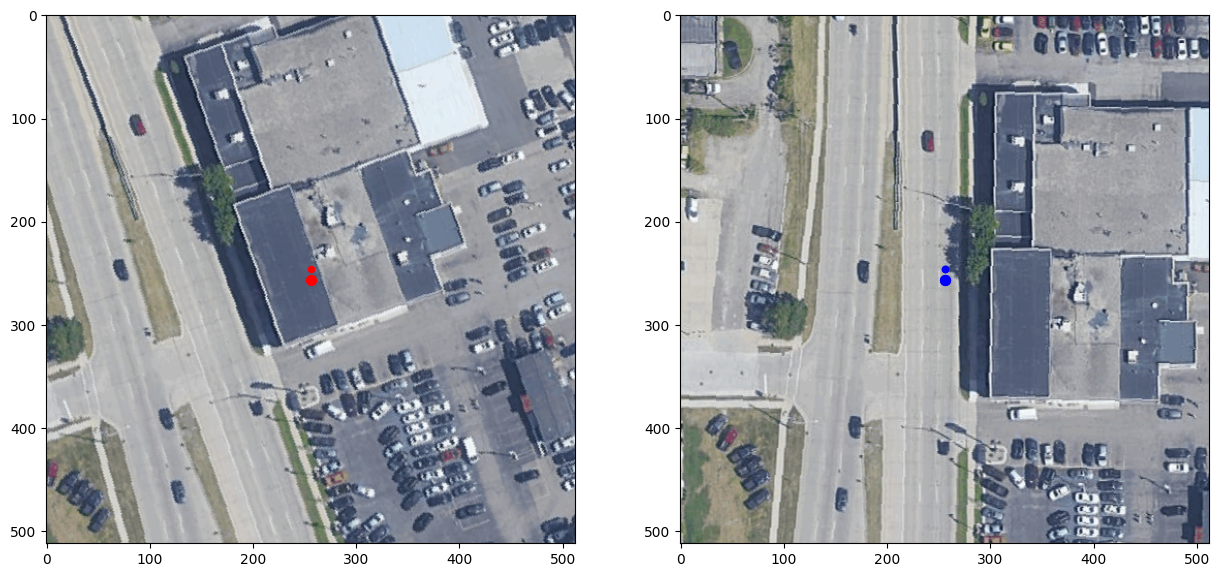

In [4]:
# load 1 sample 
# plot sat_img with and without gpus noise 
import numpy as np
idx = 0


sat_img, grd_imgs, gt_shift_u, gt_shift_v, gt_heading, grd_names, sat_img_norot_notran = [[camera.to(device) if type(camera) == torch.Tensor else camera for camera in item] if type(item)== list else item.to(device) if type(item) == torch.Tensor else item for item in data_set[idx]]
sat_img = sat_img.unsqueeze(0)
sat_img_norot_notran = sat_img_norot_notran.unsqueeze(0)


print(f'dx = {gt_shift_v} dy = {gt_shift_u} dth = {gt_heading}')
# plot satellite  map with and with out gps error 
from matplotlib import pyplot as plt 

plt.figure(figsize=(15,15))

sat_size = 512

img1 = sat_img[0].permute([1,2,0])
plt.subplot(1,2,1)
plt.imshow(img1)
plt.scatter(sat_size//2, sat_size//2, color = 'red', s= 50)
plt.scatter(sat_size//2, sat_size//2-10, color = 'red', s= 20)

img2 = sat_img_norot_notran[0].permute([1,2,0])
plt.subplot(1,2,2)
plt.imshow(img2)
plt.scatter(sat_size//2, sat_size//2, color = 'blue', s= 50)
plt.scatter(sat_size//2, sat_size//2-10, color = 'blue', s= 20)

plt.scatter(sat_size//2, sat_size//2, color = 'blue', s= 50)
plt.scatter(sat_size//2, sat_size//2-10, color = 'blue', s= 20)

dx_pix = gt_shift_v * data_set.shift_range_meters_lon/ data_set.meters_per_pixel
dy_pix = gt_shift_u * data_set.shift_range_meters_lon/ data_set.meters_per_pixel

a = 10
gt_theta =  gt_heading * data_set.rotation_range * np.pi/180
dx_pix_th =  -np.cos(gt_theta) * a
dy_pix_th =  np.sin(gt_theta) * a

plt.scatter(sat_size//2+dy_pix, sat_size//2+dx_pix, color = 'red', s= 50)
plt.scatter(sat_size//2+dy_pix+dy_pix_th, sat_size//2+dx_pix+dx_pix_th, color = 'red', s= 20)


